<a href="https://colab.research.google.com/github/jinbac/Mnist/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import matplotlib.pyplot

In [3]:
# import mnist dataset
(TrainSet, TrainLabels), (TestSet, TestLabels) =  tensorflow.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# downscall to 0-1 
#possibly should use -1 - 1 range
TrainSet = TrainSet / 255.
TestSet = TestSet / 255.

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


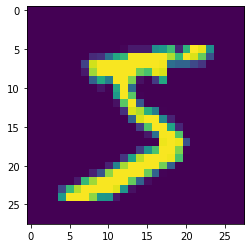

In [5]:
#display info and image to verify dataset
print(TrainSet.shape)
print(TestSet.shape)
print(TrainLabels)
print(TestLabels)

matplotlib.pyplot.imshow(TrainSet[0])
matplotlib.pyplot.show()

In [6]:
# Build neural network on basic sequential model
model = tensorflow.keras.models.Sequential() # build shell of model

model.add(tensorflow.keras.layers.Flatten(input_shape = (28,28))) # flatten images into vectors 
model.add(tensorflow.keras.layers.Dense(128, activation = 'relu')) # add fully connected layer with 128 nuerons and relu activation function
model.add(tensorflow.keras.layers.Dense(10, activation = 'softmax')) # condense information with softmax to classes 0-9 

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy' , 'top_k_categorical_accuracy']) #compile model with adam optimizer and display accuracy

model.fit(TrainSet, TrainLabels, epochs = 5)  # train models on training data for 5 epochs

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2559 - accuracy: 0.9258 - top_k_categorical_accuracy: 0.3680
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1131 - accuracy: 0.9664 - top_k_categorical_accuracy: 0.3454
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0775 - accuracy: 0.9768 - top_k_categorical_accuracy: 0.3262
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0585 - accuracy: 0.9820 - top_k_categorical_accuracy: 0.3332
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0449 - accuracy: 0.9863 - top_k_categorical_accuracy: 0.3178


In [24]:
# test model against test data
TestLoss, TestAccuracy, TestTopK = model.evaluate(TestSet, TestLabels)
print ('Test Accuracy', TestAccuracy, 'TestTopK', TestTopK)

313/313 [==============================] - 1s 1ms/step - loss: 0.0828 - accuracy: 0.9737 - top_k_categorical_accuracy: 0.2476
Test Accuracy 0.9736999869346619 TestTopK 0.2476000040769577
